# **Import Library**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Head data**

Kode ini berfungsi untuk membaca file CSV yang berada di Google Drive dan menampilkan 5 baris pertama dari DataFrame yang dihasilkan.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/tb_2_ds.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# **Jumlah baris dan kolom**

Menampilkan jumlah baris dan kolom

In [ ]:
df.shape

(2111, 17)

# **Melihat Grafik Bar dari data**

Kode ini berfungsi untuk membuat bar plots yang menggambarkan distribusi frekuensi dari beberapa kolom dalam DataFrame df, seperti Gender, family_history_with_overweight, FAVC, SMOKE, dan SCC.


**Bar untuk data yang hanya memiliki 2 kategori, yakni "YES" dan "NO" atau data gender**

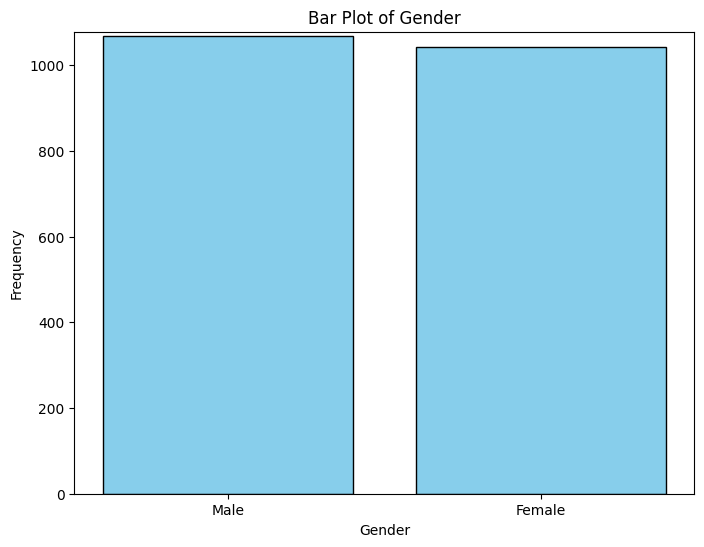

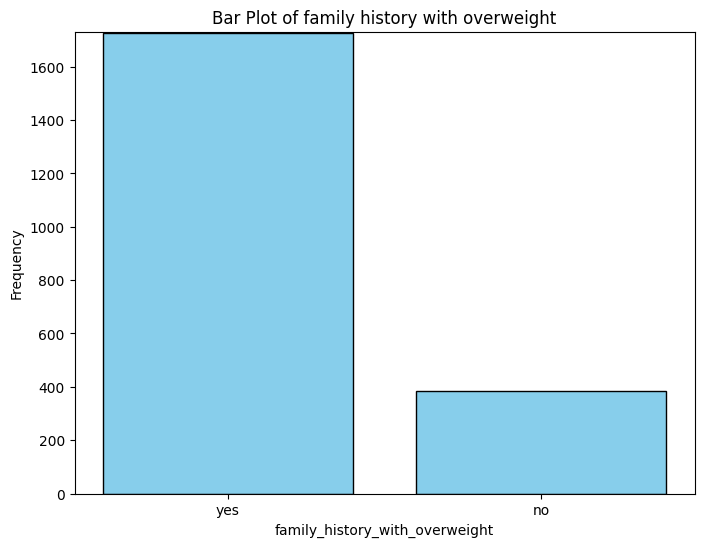

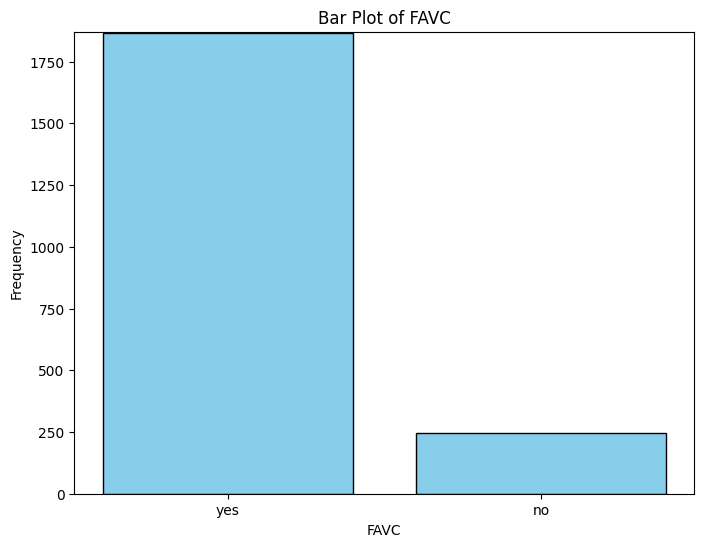

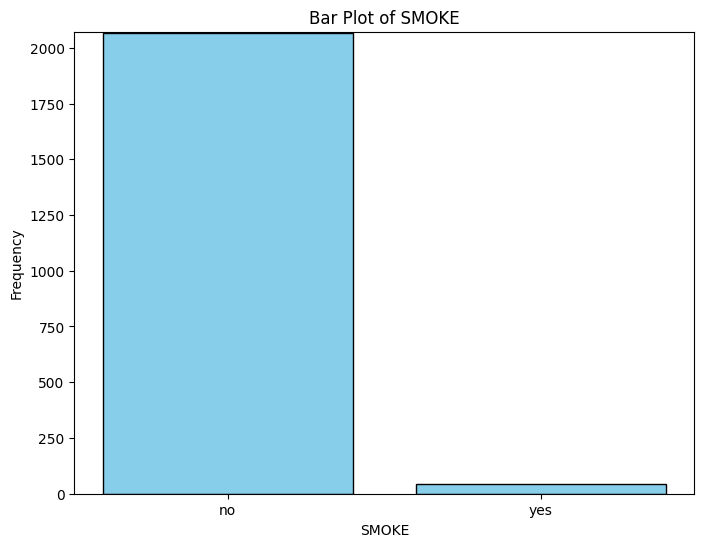

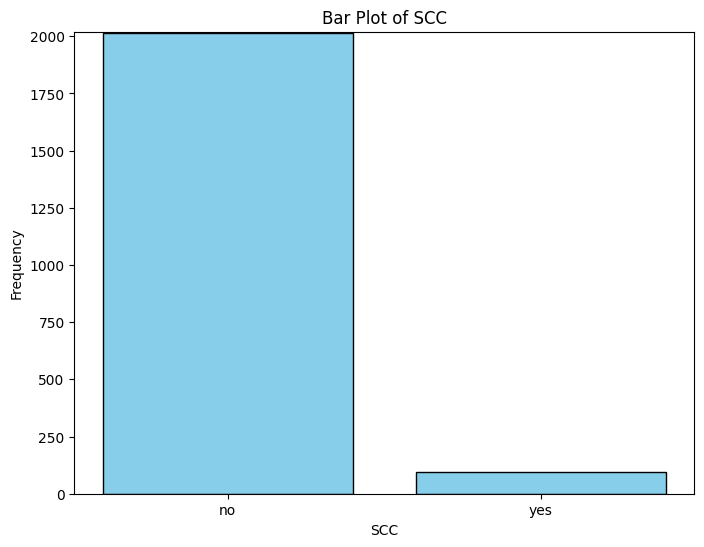

In [ ]:
column_counts_gender = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(column_counts_gender.index, column_counts_gender.values, color='skyblue', edgecolor='black')
plt.title('Bar Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.ylim(0, max(column_counts_gender.values) + 10)
plt.xticks([0, 1])
plt.show()

column_counts_fam = df['family_history_with_overweight'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(column_counts_fam.index, column_counts_fam.values, color='skyblue', edgecolor='black')
plt.title('Bar Plot of family history with overweight')
plt.xlabel('family_history_with_overweight')
plt.ylabel('Frequency')
plt.ylim(0, max(column_counts_fam.values) + 5)
plt.xticks([0, 1])
plt.show()

column_counts_favc = df['FAVC'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(column_counts_favc.index, column_counts_favc.values, color='skyblue', edgecolor='black')
plt.title('Bar Plot of FAVC')
plt.xlabel('FAVC')
plt.ylabel('Frequency')
plt.ylim(0, max(column_counts_favc.values) + 5)
plt.xticks([0, 1])
plt.show()

column_counts_smoke = df['SMOKE'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(column_counts_smoke.index, column_counts_smoke.values, color='skyblue', edgecolor='black')
plt.title('Bar Plot of SMOKE')
plt.xlabel('SMOKE')
plt.ylabel('Frequency')
plt.ylim(0, max(column_counts_smoke.values) + 5)
plt.xticks([0, 1])
plt.show()

column_counts_scc = df['SCC'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(column_counts_scc.index, column_counts_scc.values, color='skyblue', edgecolor='black')
plt.title('Bar Plot of SCC')
plt.xlabel('SCC')
plt.ylabel('Frequency')
plt.ylim(0, max(column_counts_scc.values) + 5)
plt.xticks([0, 1])
plt.show()

Kode ini berfungsi untuk membuat bar plots untuk setiap kolom dalam daftar columns_to_plot. Bar plot ini menggambarkan distribusi frekuensi dari nilai-nilai yang ada di masing-masing kolom. Jika kolom tersebut berisi data kategorikal (object), label sumbu X akan diputar agar lebih mudah dibaca.

Inti fungsinya:
Menampilkan bar plots untuk kolom-kolom dalam columns_to_plot.
Menyesuaikan tampilan berdasarkan tipe data kolom:
Untuk kolom dengan tipe data kategorikal, label sumbu X diputar.
Menampilkan frekuensi distribusi setiap nilai pada setiap kolom yang dipilih.


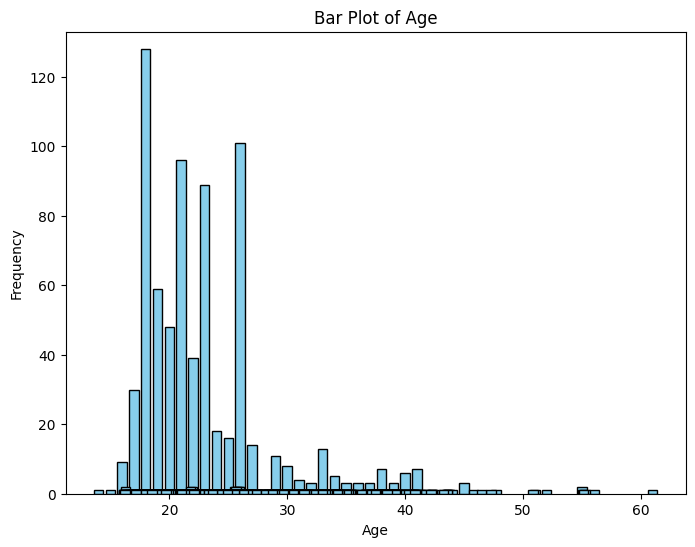

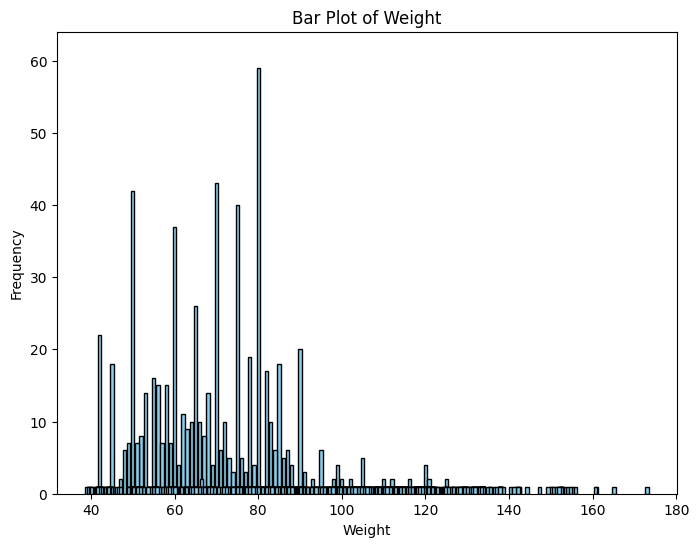

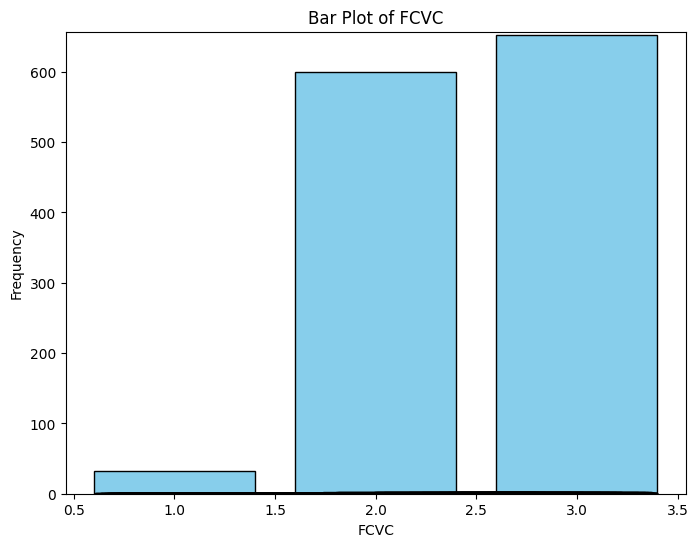

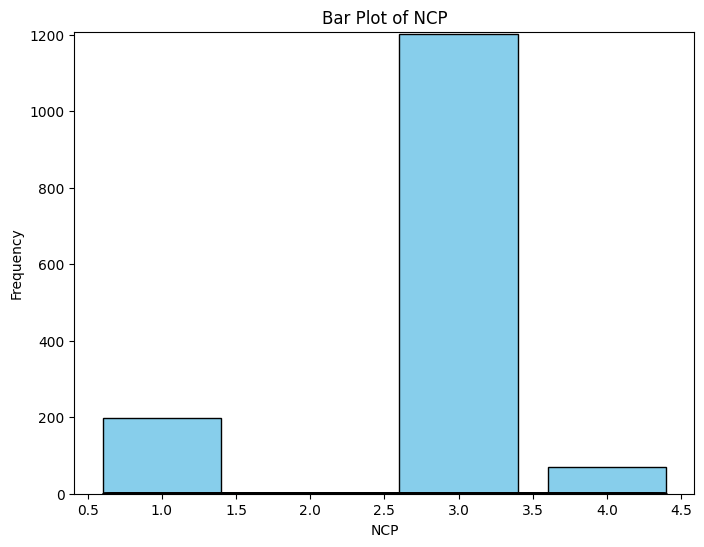

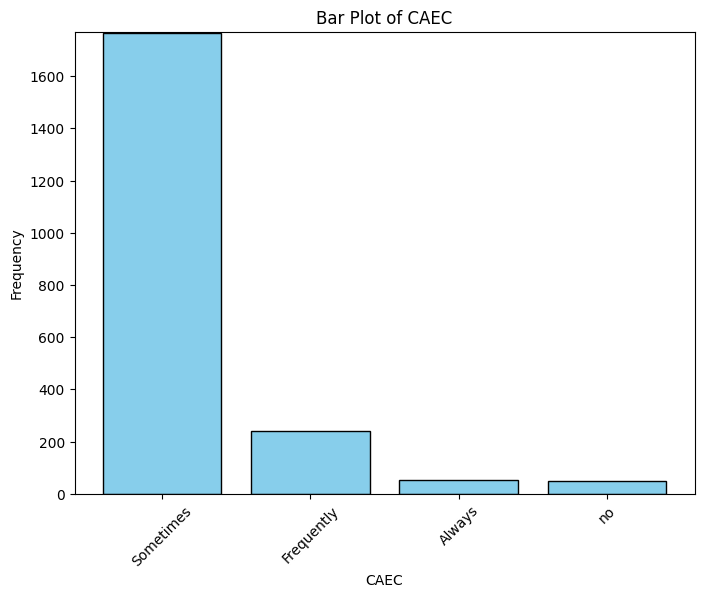

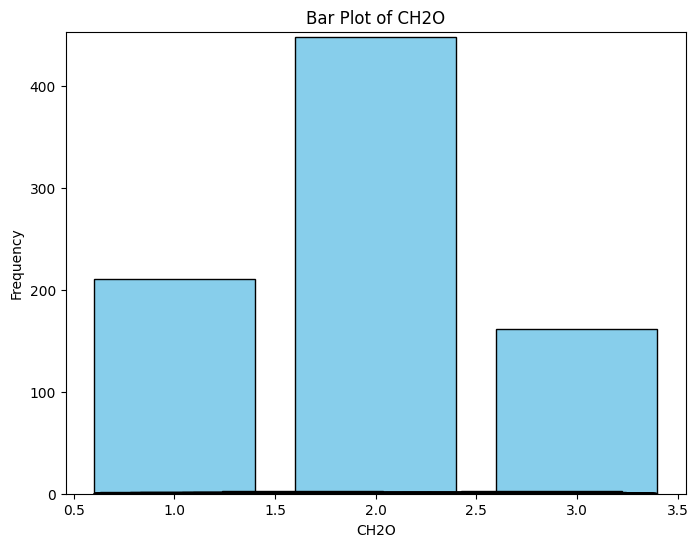

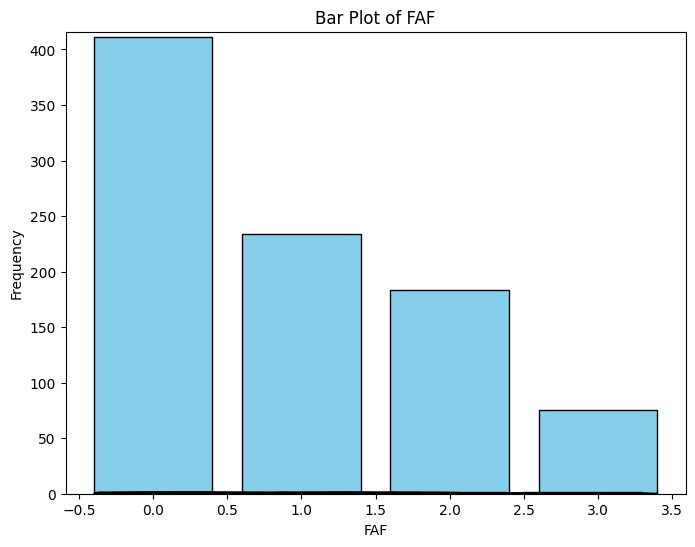

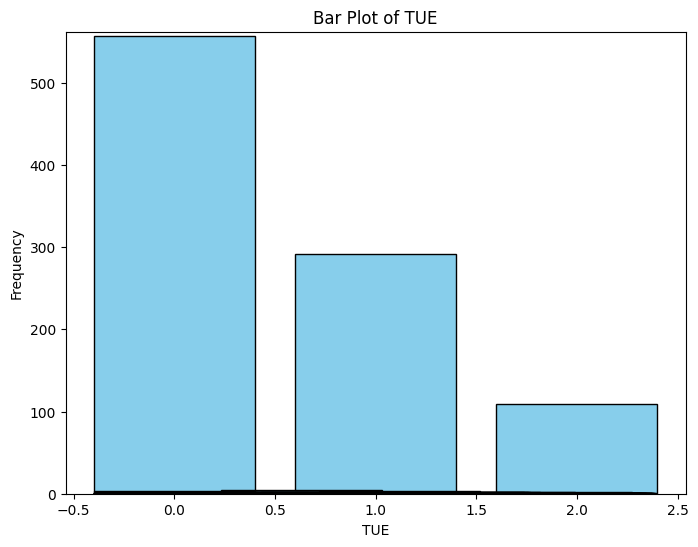

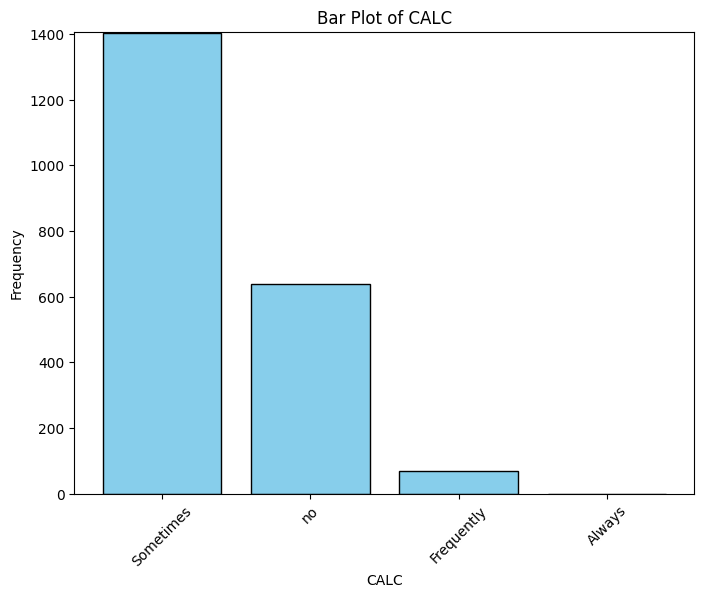

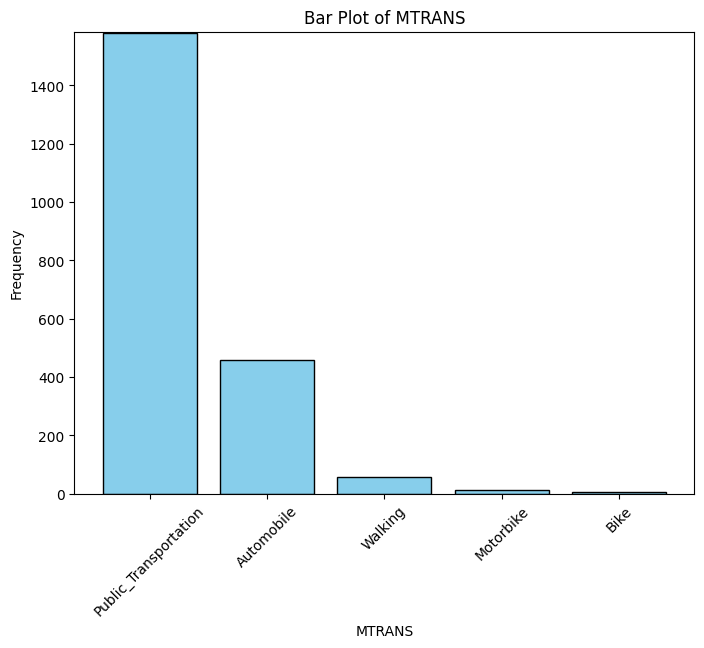

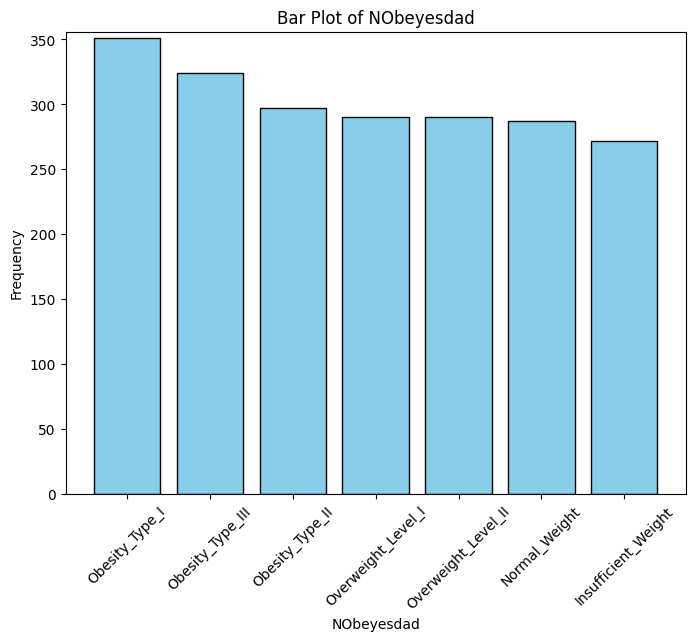

In [ ]:
columns_to_plot = [
    'Age','Weight','FCVC', 'NCP', 'CAEC', 'CH2O','FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'
]

for column in columns_to_plot:
    if df[column].dtype == 'object':
        column_counts = df[column].value_counts()
    else:
        column_counts = df[column].value_counts()

    plt.figure(figsize=(8, 6))
    plt.bar(column_counts.index, column_counts.values, color='skyblue', edgecolor='black')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.ylim(0, max(column_counts.values) + 5)

    if df[column].dtype == 'object':
        plt.xticks(rotation=45)

    plt.show()

##**Menampilkan info data**

Kode ini berfungsi untuk membuat sebuah DataFrame yang menampilkan informasi tentang tipe data, jumlah nilai unik, dan jumlah nilai yang hilang (null) untuk setiap kolom dalam DataFrame df.

In [ ]:
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

,Dtype,Unique,Null
Gender,object,2,0
Age,float64,1402,0
Height,float64,1574,0
Weight,float64,1525,0
family_history_with_overweight,object,2,0
FAVC,object,2,0
FCVC,float64,810,0
NCP,float64,635,0
CAEC,object,4,0
SMOKE,object,2,0


# **Menampilkan jumlah data duplikat**

Kode ini berfungsi untuk mendeteksi dan menghitung baris duplikat dalam DataFrame df, serta menghitung jumlah dan persentase baris yang duplikat.


In [ ]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
mean_duplicates = duplicates.mean()
print(f"Jumlah Baris Duplikat {num_duplicates}")
print(f'Persentase duplikat pada data {mean_duplicates}')


Jumlah Baris Duplikat 24
Persentase duplikat pada data 0.011369019422074847


# **Drop duplikat**

Kode ini berfungsi untuk menghapus baris duplikat dalam DataFrame df dan menyimpan hasilnya dalam variabel data

In [ ]:
data = df.drop_duplicates()
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# **Setelah Drop Duplikat**

Kode ini berfungsi untuk mendeteksi, menghitung, dan menampilkan baris yang duplikat dalam DataFrame df, serta menghitung jumlah dan persentase baris yang duplikat.

In [ ]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
mean_duplicates = duplicates.mean()
print(f"Jumlah Baris Duplikat {num_duplicates}")
print(f'Persentase duplikat pada data {mean_duplicates}')


Jumlah Baris Duplikat 24
Persentase duplikat pada data 0.011369019422074847


# **Describe data**

Kode ini berfungsi untuk menampilkan ringkasan statistik deskriptif dari DataFrame data yang telah diubah menjadi df

In [ ]:
df=data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2087.0,24.353090,6.368801,14.00,19.915937,22.847618,26.000000,61.00
Height,2087.0,1.702674,0.093186,1.45,1.630178,1.701584,1.769491,1.98
Weight,2087.0,86.858730,26.190847,39.00,66.000000,83.101100,108.015907,173.00
FCVC,2087.0,2.421466,0.534737,1.00,2.000000,2.396265,3.000000,3.00
NCP,2087.0,2.701179,0.764614,1.00,2.697467,3.000000,3.000000,4.00
CH2O,2087.0,2.004749,0.608284,1.00,1.590922,2.000000,2.466193,3.00
FAF,2087.0,1.012812,0.853475,0.00,0.124505,1.000000,1.678102,3.00
TUE,2087.0,0.663035,0.608153,0.00,0.000000,0.630866,1.000000,2.00


# **Cek missing value**

Kode ini digunakan untuk mendeteksi dan menampilkan kolom-kolom yang memiliki nilai hilang (missing values) dalam DataFrame data. Missing values sering kali ditemukan dalam dataset dan perlu ditangani sebelum analisis lebih lanjut. Berikut adalah penjelasan lebih mendalam mengenai setiap bagian kode ini:

In [ ]:
missing_values = data.isnull().sum()

print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Series([], dtype: int64)


# **Menampilkan kategori data**


Kode ini berfungsi untuk mengidentifikasi kolom-kolom kategorikal dalam DataFrame data yang memiliki nilai unik kurang dari atau sama dengan 50 dan kemudian menampilkan daftar nilai unik di setiap kolom tersebut. Kolom kategorikal biasanya berisi data yang bersifat kategori, seperti teks atau label, yang tidak dapat dihitung dengan operasi aritmatika.

In [ ]:
categorical_col = []
for col in data.columns:
    if data[col].dtype == 'object'and len(data[col].unique()) <=50:
        categorical_col.append(col)
        print(f'{col}: {data[col].unique()}')
        print('================================')

Gender: ['Female' 'Male']
family_history_with_overweight: ['yes' 'no']
FAVC: ['no' 'yes']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


# **Melihat Grafik Histogram dari data**

Kode ini digunakan untuk membuat histogram untuk setiap kolom numerik dalam DataFrame data, yang akan membantu memvisualisasikan distribusi data pada setiap kolom numerik. Histogram adalah alat yang berguna untuk memahami distribusi nilai-nilai dalam data numerik

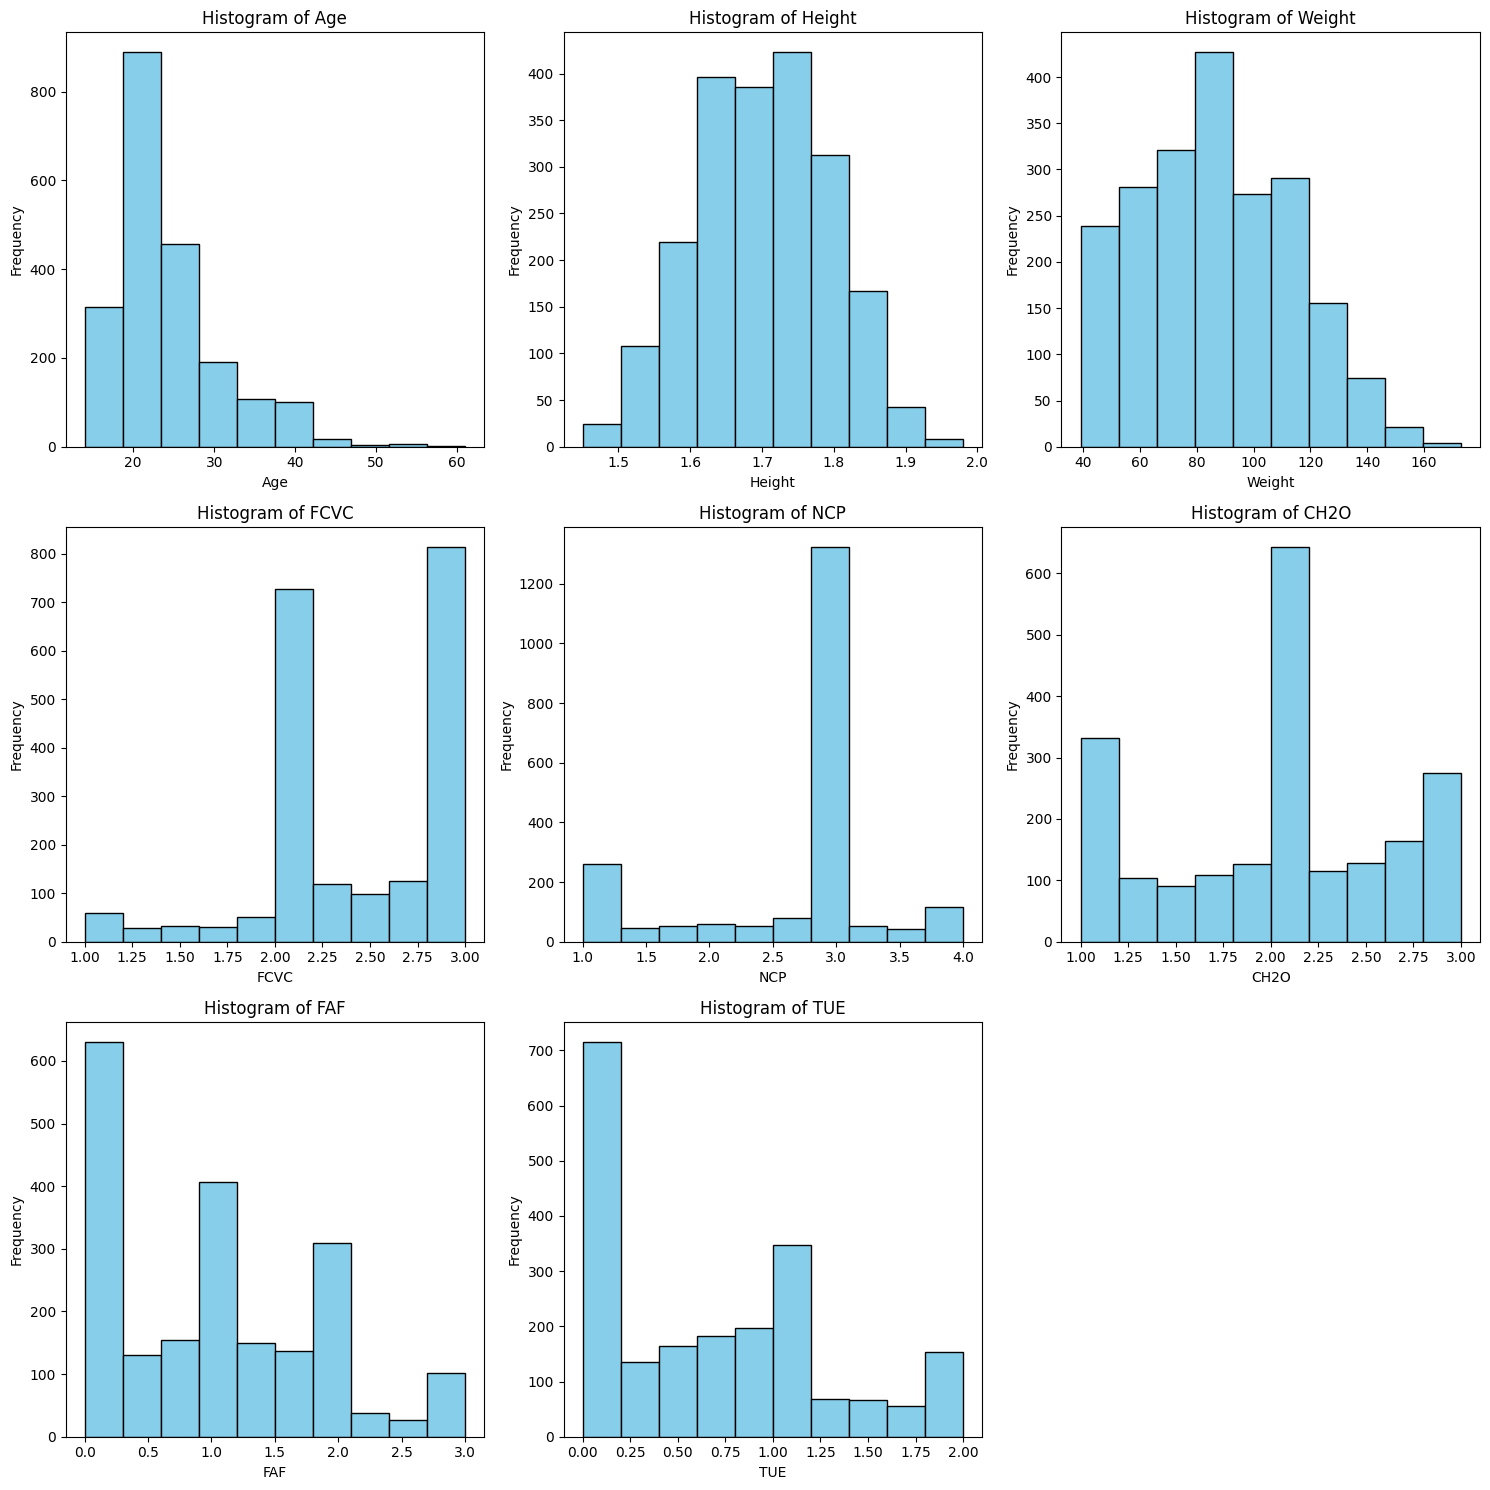

In [ ]:
import matplotlib.pyplot as plt

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

num_columns = len(numeric_columns)
num_rows = (num_columns + 2) // 3

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 3, i)
    plt.hist(data[col].dropna(), bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **Mengubah tipe data object ke numeric**

Kode ini digunakan untuk mengubah kolom bertipe objek (kategori) dalam DataFrame data menjadi nilai numerik menggunakan LabelEncoder dari pustaka scikit-learn. Label encoding mengonversi kategori atau label menjadi angka, yang memungkinkan data kategorikal digunakan dalam model machine learning yang memerlukan input numerik.

In [ ]:
label_encoder = LabelEncoder()

df_final = data

# Menggunakan LabelEncoder untuk mentransformasikan kolom bertipe object
for col in df_final.select_dtypes(include=['object']).columns:
    df_final[col] = label_encoder.fit_transform(df_final[col])

print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   int64  
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   int64  
 5   FAVC                            2087 non-null   int64  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   int64  
 9   SMOKE                           2087 non-null   int64  
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   int64  
 12  FAF                             2087 no

Kode df_final.describe().T digunakan untuk menghasilkan statistik deskriptif untuk DataFrame df_final, yang memberikan gambaran umum tentang distribusi data numerik dalam dataset. Perintah ini akan mengembalikan nilai-nilai seperti rata-rata, standar deviasi, minimum, dan maksimum untuk setiap kolom numerik dalam DataFrame.

In [ ]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,2087.0,0.504073,0.500103,0.00,0.000000,1.000000,1.000000,1.00
Age,2087.0,24.353090,6.368801,14.00,19.915937,22.847618,26.000000,61.00
Height,2087.0,1.702674,0.093186,1.45,1.630178,1.701584,1.769491,1.98
Weight,2087.0,86.858730,26.190847,39.00,66.000000,83.101100,108.015907,173.00
family_history_with_overweight,2087.0,0.825108,0.379966,0.00,1.000000,1.000000,1.000000,1.00
FAVC,2087.0,0.883565,0.320823,0.00,1.000000,1.000000,1.000000,1.00
FCVC,2087.0,2.421466,0.534737,1.00,2.000000,2.396265,3.000000,3.00
NCP,2087.0,2.701179,0.764614,1.00,2.697467,3.000000,3.000000,4.00
CAEC,2087.0,1.853857,0.459494,0.00,2.000000,2.000000,2.000000,3.00
SMOKE,2087.0,0.021083,0.143695,0.00,0.000000,0.000000,0.000000,1.00


# **Grafik Correlation Matrix**

Kode import seaborn as sns digunakan untuk membuat heatmap yang menunjukkan matriks korelasi antara kolom-kolom numerik dalam DataFrame df. Korelasi mengukur sejauh mana dua variabel saling berkaitan, dan heatmap ini membantu dalam visualisasi hubungan antara variabel-variabel tersebut.

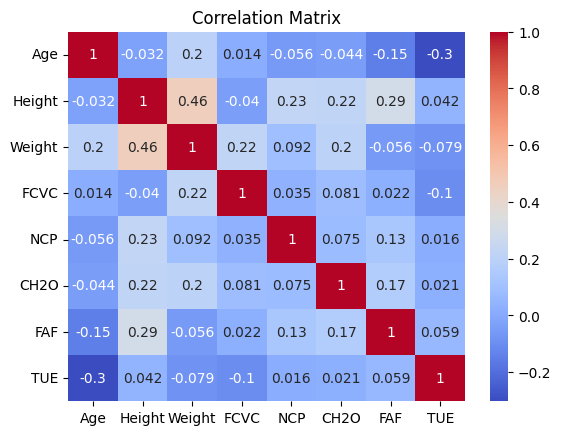

In [ ]:
import seaborn as sns

numerical_df = df.select_dtypes(include=['float64'])
correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Menentukan ukuran test size terbaik pada data**

Kode ini digunakan untuk mengevaluasi performa model Decision Tree Classifier pada dataset dengan berbagai ukuran data uji (test size). Evaluasi dilakukan menggunakan beberapa metrik seperti Accuracy, Precision, Recall, dan F1-Score, dan hasilnya diplot untuk memudahkan visualisasi perbandingan antar metrik pada berbagai ukuran data uji.

Test Size (%)	Accuracy	Precision	Recall	F1-Score
------------------------------------------------------
    5%	0.93	0.94	0.93	0.93
   10%	0.89	0.89	0.89	0.89
   15%	0.93	0.93	0.93	0.93
   20%	0.91	0.91	0.91	0.91
   25%	0.93	0.93	0.93	0.93
   30%	0.93	0.93	0.93	0.93
   35%	0.93	0.93	0.93	0.93
   40%	0.90	0.90	0.90	0.90
   45%	0.92	0.92	0.92	0.92
   50%	0.90	0.90	0.90	0.90


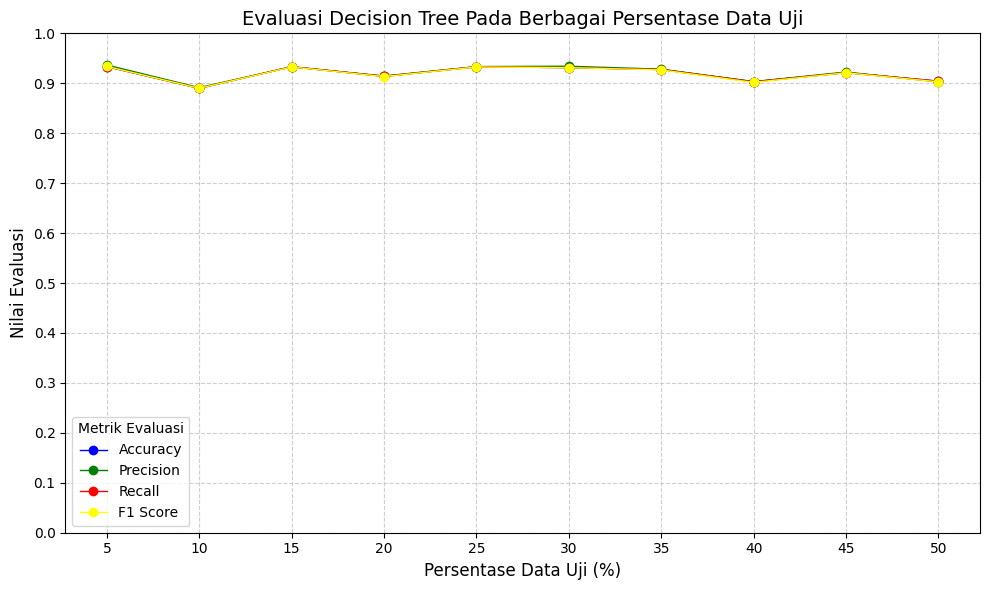

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Features and target
X = df_final.drop(columns=['NObeyesdad', 'FAVC'])  # Features excluding the target column
y = df_final['NObeyesdad']

# Model to use
clf = DecisionTreeClassifier(random_state=42)

# List of test size percentages
test_sizes = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]

# Initialize lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

print("Test Size (%)\tAccuracy\tPrecision\tRecall\tF1-Score")
print("------------------------------------------------------")

# Loop through test sizes and perform training/testing
for test_size in test_sizes:
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Print the metrics for the current test size
    print(f"{int(test_size * 100):>5}%\t{accuracy:.2f}\t{precision:.2f}\t{recall:.2f}\t{f1:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
x_values = [int(size * 100) for size in test_sizes]  # Convert test sizes to percentages

plt.plot(x_values, accuracies, marker='o', linestyle='-', linewidth=1, label='Accuracy', color='blue')
plt.plot(x_values, precisions, marker='o', linestyle='-', linewidth=1, label='Precision', color='green')
plt.plot(x_values, recalls, marker='o', linestyle='-', linewidth=1, label='Recall', color='red')
plt.plot(x_values, f1_scores, marker='o', linestyle='-', linewidth=1, label='F1 Score', color='yellow')

# Customizing the plot
plt.title("Evaluasi Decision Tree Pada Berbagai Persentase Data Uji", fontsize=14)
plt.xlabel("Persentase Data Uji (%)", fontsize=12)
plt.ylabel("Nilai Evaluasi", fontsize=12)
plt.ylim(0, 1)  # Set y-axis range
plt.xticks(x_values, fontsize=10)
plt.yticks(np.linspace(0, 1, 11), fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10, title="Metrik Evaluasi")
plt.tight_layout()
plt.show()

# **Train dan Test data**


code ini untuk menunjukkan visualisasi matriks korelasi dari DataFrame yang hanya mencakup kolom numerik. Matriks korelasi digunakan untuk mengevaluasi hubungan antara variabel numerik dalam dataset. Dalam visualisasi ini, warna dan angka yang ditampilkan menunjukkan seberapa kuat hubungan linier antara pasangan variabel.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
clf = DecisionTreeClassifier(ccp_alpha=0.01)
clf = clf.fit(X_train, y_train)

In [ ]:
y_train_pred =clf.predict(X_train)

y_test_pred = clf.predict(X_test)

In [ ]:
clf.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

Kode clf.predict_proba(X_test) digunakan untuk menghasilkan probabilitas prediksi dari model pohon keputusan (Decision Tree) pada dataset uji (X_test). Berikut adalah penjelasan mengenai perbedaannya antara model pohon keputusan yang memiliki kriteria penghentian (stopping criteria) dan yang tidak.

In [ ]:
# show difference between tree that doesn't have stopping criteria and the one that does
clf.predict_proba(X_test)

array([[0.        , 0.        , 0.87857143, ..., 0.        , 0.        ,
        0.11428571],
       [0.88970588, 0.11029412, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.99561404, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.0125    , ..., 0.        , 0.        ,
        0.9875    ],
       [0.        , 0.        , 0.        , ..., 0.99561404, 0.        ,
        0.        ],
       [0.04285714, 0.91428571, 0.        , ..., 0.        , 0.04285714,
        0.        ]])

# **Evaluasi Data dengan Classification Report**

Kode ini digunakan untuk mengevaluasi performa model klasifikasi menggunakan berbagai metrik evaluasi seperti classification report, accuracy, dan F1-score. Berikut adalah penjelasan lengkap tentang setiap bagian kode tersebut:

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
print(classification_report(y_train, y_train_pred,target_names=["Insufficient Weight","Underweight","Normal", "Overweight","Obesity I", "Obesity II","Obesity III"]))
print(f"Accuracy (Training): {accuracy_score(y_train, y_train_pred):.2f}")
print(f"F1-Score (Training): {f1_score(y_train, y_train_pred, average='weighted'):.2f}")

                     precision    recall  f1-score   support

Insufficient Weight       0.90      0.96      0.93       181
        Underweight       0.88      0.79      0.83       209
             Normal       0.87      0.98      0.92       243
         Overweight       0.99      0.93      0.96       208
          Obesity I       1.00      1.00      1.00       228
         Obesity II       0.75      0.92      0.83       195
        Obesity III       0.97      0.71      0.82       196

           accuracy                           0.90      1460
          macro avg       0.91      0.90      0.90      1460
       weighted avg       0.91      0.90      0.90      1460

Accuracy (Training): 0.90
F1-Score (Training): 0.90


Kode berikut digunakan untuk mengevaluasi performa model klasifikasi pada data uji (testing) menggunakan berbagai metrik evaluasi seperti classification report, accuracy, dan F1-score, serupa dengan kode yang digunakan untuk evaluasi pada data pelatihan.

In [ ]:
print(classification_report(y_test, y_test_pred,target_names=["Insufficient Weight","Underweight","Normal", "Overweight","Obesity I", "Obesity II","Obesity III"]))
print(f"Accuracy (Testing): {accuracy_score(y_test, y_test_pred):.2f}")
print(f"F1-Score (Testing): {f1_score(y_test, y_test_pred, average='weighted'):.2f}")

                     precision    recall  f1-score   support

Insufficient Weight       0.89      0.97      0.93        86
        Underweight       0.85      0.75      0.80        73
             Normal       0.79      0.98      0.87       108
         Overweight       1.00      0.91      0.95        89
          Obesity I       1.00      1.00      1.00        96
         Obesity II       0.75      0.86      0.80        81
        Obesity III       0.91      0.62      0.73        94

           accuracy                           0.88       627
          macro avg       0.88      0.87      0.87       627
       weighted avg       0.88      0.88      0.87       627

Accuracy (Testing): 0.88
F1-Score (Testing): 0.87


Kode ini digunakan untuk mengevaluasi kinerja model klasifikasi dengan menghitung dan menampilkan akurasi dan F1-score pada data pelatihan (training) dan data pengujian (testing). Selain itu, kode ini juga digunakan untuk mendeteksi apakah model mengalami overfitting.

Secara keseluruhan, kode ini memberikan gambaran tentang seberapa baik model bekerja dalam memprediksi kelas pada data yang telah dilatih dan diuji. Evaluasi dilakukan dengan menggunakan dua metrik utama, yaitu akurasi dan F1-score:

Akurasi menunjukkan sejauh mana model dapat mengklasifikasikan data dengan benar.
F1-score adalah metrik yang lebih menyeluruh untuk menilai kualitas prediksi model, khususnya untuk data yang tidak seimbang.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Tampilkan hasil
print(f"Akurasi Data Training: {train_accuracy:.2f}")
print(f"F1-Score Data Training: {train_f1:.2f}")
print(f"Akurasi Data Testing: {test_accuracy:.2f}")
print(f"F1-Score Data Testing: {test_f1:.2f}")


# Cek apakah model overfit
if train_accuracy > test_accuracy + 0.1:
    print("Model mungkin overfit: Akurasi data training jauh lebih tinggi daripada data testing.")
else:
    print("Model tidak overfit.")

Akurasi Data Training: 0.90
F1-Score Data Training: 0.90
Akurasi Data Testing: 0.88
F1-Score Data Testing: 0.87
Model tidak overfit.


Kode ini digunakan untuk mengevaluasi kinerja model klasifikasi dengan menghitung metrik seperti accuracy, precision, recall, dan F1-score pada data pelatihan dan pengujian. Hasil evaluasi ditampilkan dalam bentuk teks dan juga divisualisasikan dengan grafik garis untuk membandingkan metrik antara data pelatihan dan pengujian. Grafik ini membantu menilai apakah model overfit dan memberikan gambaran yang jelas tentang performa model pada kedua set data.








Accuracy (Training): 0.90
Precision (Training): 0.91
Recall (Training): 0.90
F1-Score (Training): 0.90
------------------------------------------------------------
Accuracy (Testing): 0.88
Precision (Testing): 0.88
Recall (Testing): 0.88
F1-Score (Testing): 0.87


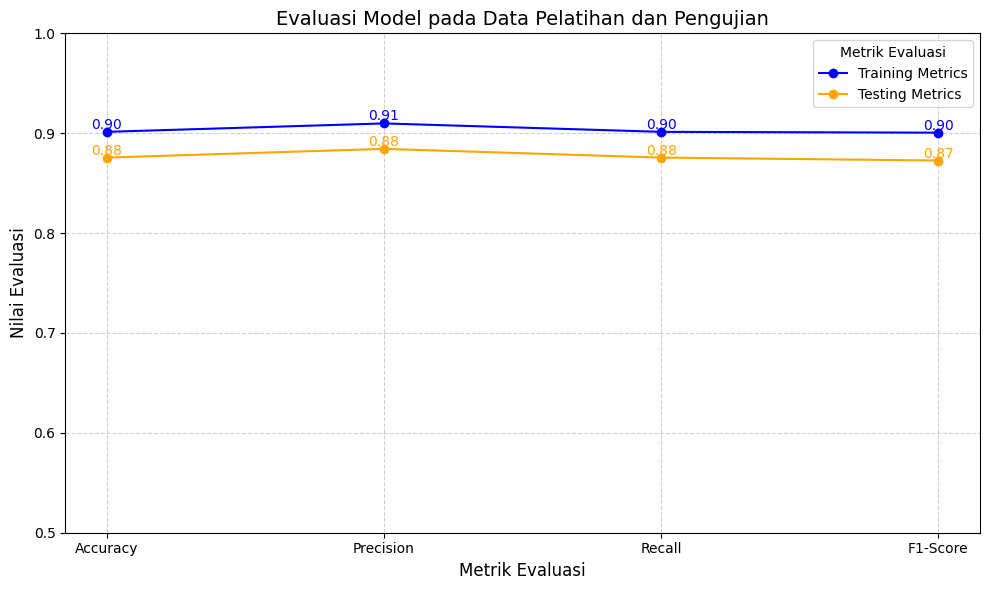

In [ ]:
precision_train = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
recall_train = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)

print(f"Accuracy (Training): {train_accuracy:.2f}")
print(f"Precision (Training): {precision_train:.2f}")
print(f"Recall (Training): {recall_train:.2f}")
print(f"F1-Score (Training): {train_f1:.2f}")

# Testing evaluationa
print('-'*60)
precision_test = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall_test = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

print(f"Accuracy (Testing): {test_accuracy:.2f}")
print(f"Precision (Testing): {precision_test:.2f}")
print(f"Recall (Testing): {recall_test:.2f}")
print(f"F1-Score (Testing): {test_f1:.2f}")

# Define the metrics and their values for both training and testing
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
train_values = [train_accuracy, precision_train, recall_train, train_f1]
test_values = [test_accuracy, precision_test, recall_test, test_f1]

# Plotting
plt.figure(figsize=(10, 6))

# Plot the training metrics
plt.plot(metrics, train_values, marker='o', linestyle='-', color='blue', label='Training Metrics')

# Plot the testing metrics
plt.plot(metrics, test_values, marker='o', linestyle='-', color='orange', label='Testing Metrics')

# Add values to the points on the plot
for i, value in enumerate(train_values):
    plt.text(metrics[i], value, f"{value:.2f}", ha='center', va='bottom', fontsize=10, color='blue')

for i, value in enumerate(test_values):
    plt.text(metrics[i], value, f"{value:.2f}", ha='center', va='bottom', fontsize=10, color='orange')

# Customizing the plot
plt.title("Evaluasi Model pada Data Pelatihan dan Pengujian", fontsize=14)
plt.xlabel("Metrik Evaluasi", fontsize=12)
plt.ylabel("Nilai Evaluasi", fontsize=12)

# Set y-axis range from 0.5 to 1 with a frequency of 0.1
plt.ylim(0.5, 1)  # Set y-axis range
plt.yticks(np.arange(0.5, 1.01, 0.1), fontsize=10)  # Set y-ticks with a step of 0.1
plt.xticks(metrics, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend and finalize layout
plt.legend(fontsize=10, title="Metrik Evaluasi")
plt.tight_layout()
plt.show()

# **Confusion Matrix**

Kode ini digunakan untuk menghitung confusion matrix antara label asli (y_test) dan label prediksi (y_test_pred) pada data pengujian. Confusion matrix adalah alat yang digunakan untuk mengevaluasi performa model klasifikasi dengan menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.

In [ ]:
confusion_matrix(y_test, y_test_pred, labels=[0,1,2,3,4,5,6])

array([[ 83,   3,   0,   0,   0,   0,   0],
       [ 10,  55,   0,   0,   0,   8,   0],
       [  0,   0, 106,   0,   0,   1,   1],
       [  0,   0,   8,  81,   0,   0,   0],
       [  0,   0,   0,   0,  96,   0,   0],
       [  0,   6,   0,   0,   0,  70,   5],
       [  0,   1,  21,   0,   0,  14,  58]])

# **Nama-nama Fitur**

Kode ini digunakan untuk mendapatkan dan menampilkan nama-nama fitur (kolom) yang ada pada dataset X, yang berisi data input atau fitur yang digunakan untuk melatih model.

In [ ]:
feature_names = X.columns
feature_names

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'MTRANS'],
      dtype='object')

# **Nilai Importance Fitur-fitur**


Kode ini digunakan untuk mengakses nilai pentingnya fitur (feature importances) dari model clf yang telah dilatih.

Nilai feature importance dihitung menggunakan atribut feature_importances_ dari model DecisionTreeClassifier yang telah dilatih.

Feature importance adalah cara untuk mengukur seberapa besar kontribusi masing-masing fitur (variabel) dalam membuat keputusan model. Dalam Decision Tree, feature importance dihitung berdasarkan seberapa banyak fitur tersebut mengurangi impurity (ketidakmurnian) pada pohon keputusan.

In [ ]:
clf.feature_importances_

array([0.19644475, 0.03497011, 0.2345815 , 0.50665371, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02734992, 0.        ])

**Proses Perhitungan Feature Importance pada Decision Tree:**
1. Decision Tree menghitung total impurity (misalnya, Gini impurity atau Entropy) dari setiap node dalam pohon.
2. Peningkatan Ketidakmurnian: Fitur yang paling sering digunakan untuk pembelahan dengan pengurangan impurity terbesar akan mendapatkan nilai feature importance yang lebih tinggi.
3. Normalisasi: Nilai feature importance akan dinormalisasi, sehingga jumlah total dari semua fitur importance adalah 1, atau setiap fitur memiliki nilai tidak lebih dari satu.

In [ ]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
Weight,0.506654
Height,0.234582
Gender,0.196445
Age,0.034970
CALC,0.027350
family_history_with_overweight,0.000000
FCVC,0.000000
NCP,0.000000
CAEC,0.000000
SMOKE,0.000000


Kode ini digunakan untuk memilih fitur-fitur yang memiliki nilai penting (feature importance) lebih besar dari 0, dan menyimpannya dalam sebuah daftar (list).

Fitur dengan kemampuan lebih besar untuk mengurangi impurity di seluruh pohon keputusan dianggap lebih penting. Decision Tree menghitung seberapa banyak impurity berkurang ketika suatu fitur digunakan untuk melakukan pembelahan di seluruh pohon, dan hasilnya akan menjadi nilai feature importance untuk setiap fitur.

In [ ]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['Weight', 'Height', 'Gender', 'Age', 'CALC']

# **Grafik Fitur Importance**

Kode ini digunakan untuk memvisualisasikan 10 fitur dengan nilai penting (feature importance) tertinggi dalam bentuk grafik batang horizontal. Fitur-fitur diurutkan dari yang paling rendah ke yang paling tinggi. Grafik ini membantu untuk melihat fitur mana yang paling berpengaruh dalam model.

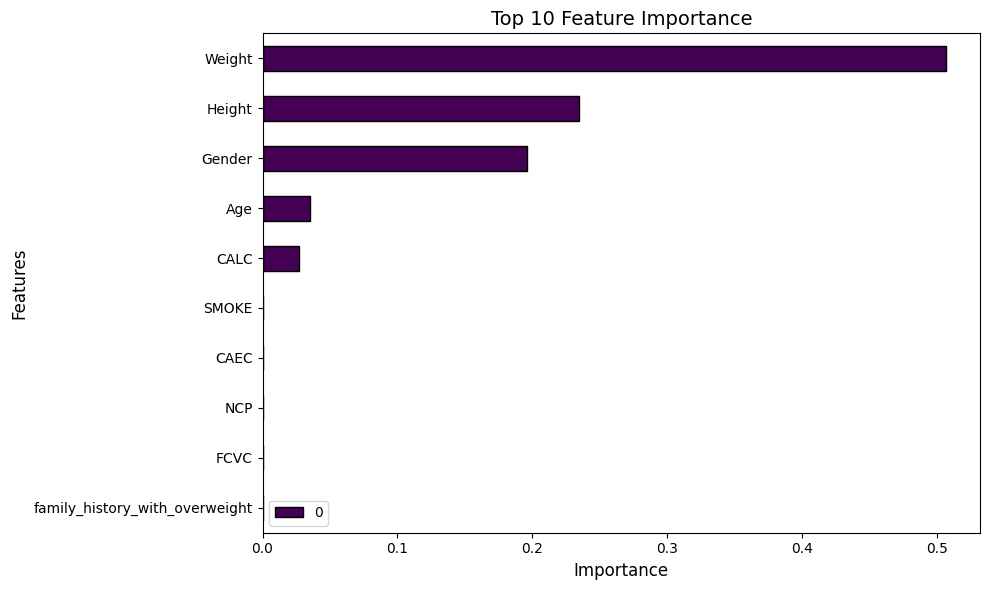

In [ ]:
# Urutkan feature_importance dari yang terbesar ke terkecil
sorted_feature_importance = feature_importance.head(10).sort_values(by=0, ascending=True)

# Generate a list of colors with a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_feature_importance)))

# Plotting the feature importance as horizontal bars with varied colors
sorted_feature_importance.plot(kind='barh', figsize=(10, 6), color=colors, edgecolor='black')

# Adding labels and title for better clarity
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 10 Feature Importance', fontsize=14)
plt.tight_layout()

# Display the plot
plt.show()

# **Grafik Pohon Keputusan**

Kode ini digunakan untuk memvisualisasikan struktur pohon keputusan dari model clf dalam bentuk diagram pohon. Pohon keputusan digambar dengan menampilkan fitur yang digunakan, kelas prediksi, serta nilai-nilai yang membagi data pada setiap node. Dengan ukuran yang besar, diagram ini memberikan gambaran jelas tentang bagaimana model membuat keputusan berdasarkan fitur yang ada.

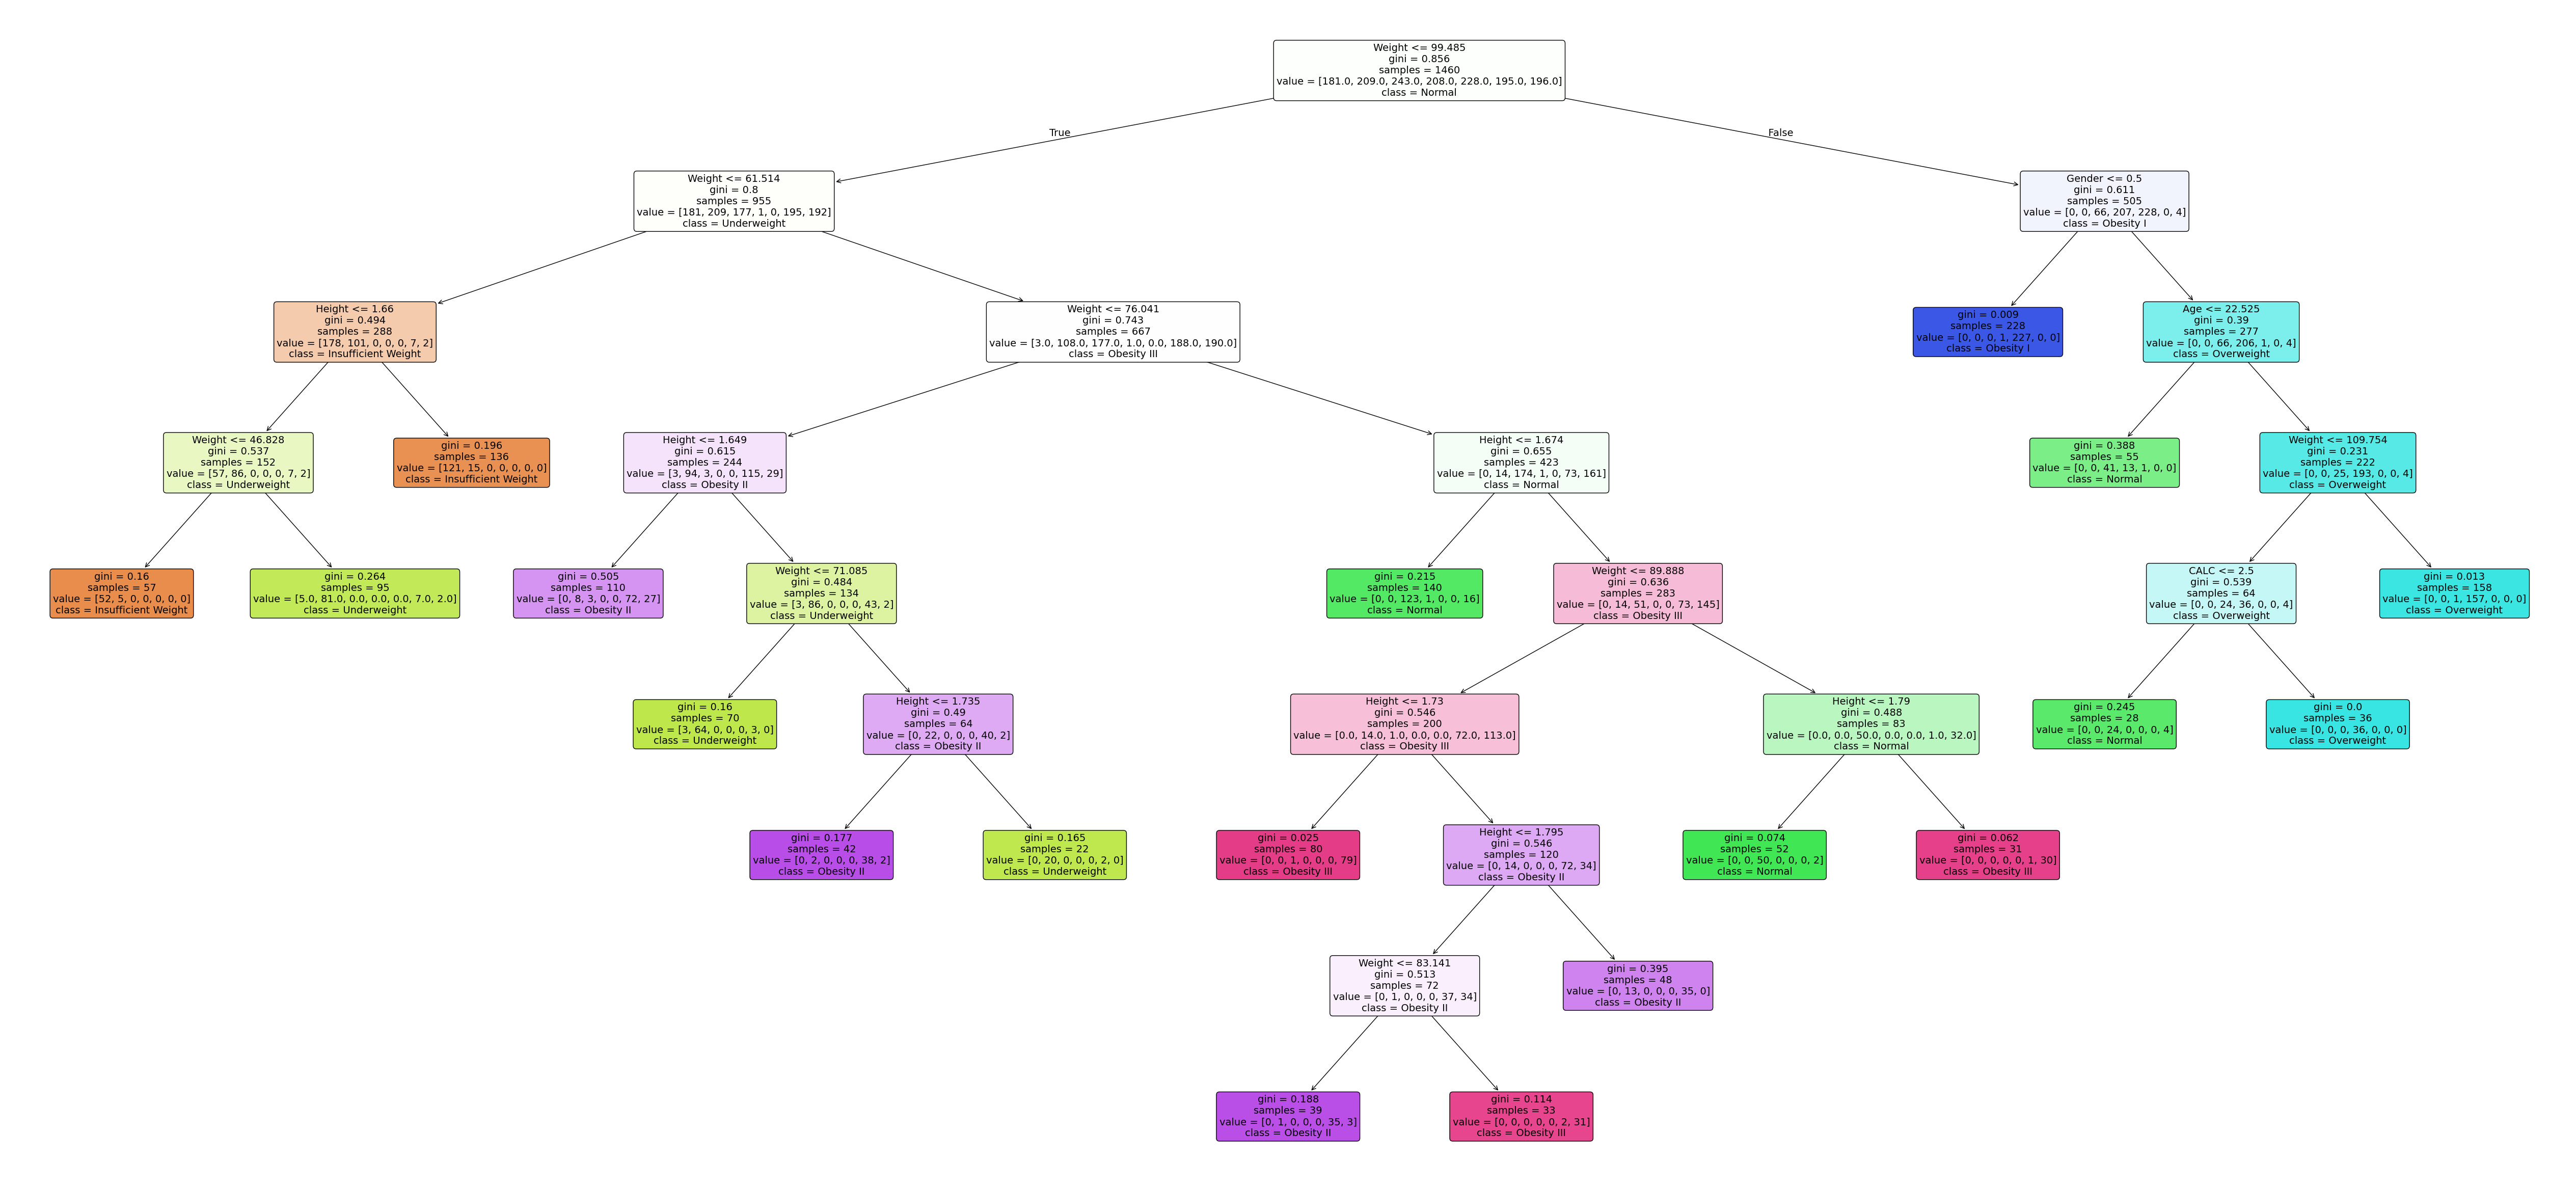

In [ ]:
fig = plt.figure(figsize=(65,30))
_ = tree.plot_tree(
    clf,
    feature_names=feature_names,
    class_names=["Insufficient Weight","Underweight", "Normal", "Overweight", "Obesity I", "Obesity II", "Obesity III"],
    filled=True,
    fontsize=14,
    rounded=True
)
plt.show()
